In [135]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import Math, Latex
from matplotlib import pyplot
import seaborn as sns

# matplotlib 对中文的支持
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文

# 保存为 pdf 格式
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8,5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 离散随机变量的期望

### 模拟射击的期望

已知甲、乙两名战士的射击水平如下

- 甲战士

| 取值 | 8 | 9 | 10 |
|-----|---|---|---|
| 概率 | 0.3 | 0.1 | 0.6 |

- 乙战士

| 取值 | 8 | 9 | 10 |
|-----|---|---|---|
| 概率 | 0.2 | 0.5 | 0.3 |

模拟两人的射击情况

In [2]:
from scipy.stats import rv_discrete
from collections import Counter

def simShooting(pmf: dict, size: int=1) -> list:
    """
    模拟射击
    
    probs: 选手的射击水平字典，key 表示环数，value 表示概率
    n: 射击次数
    """
    
    # 定义一个服从给定分布的随机变量
    X = rv_discrete(values=zip(*pmf.items()))
    return X.rvs(size=size).tolist()


def reports(name: str, data: list):
    """
    报告射击结果，包括频数、频率、均值
    
    name: 射手名称
    data: 射击数据
    """
    counting = Counter(data)
    num = len(data)
    
    for key in sorted(counting):
        print("战士 {} 命中 {:2d} 环 {:3d} 次，命中率为 {:.2f}".format(name, key, counting[key], counting[key]/num))
    
    print("战士 {} 的平均命中环数为 {:.2f} 环".format(name, sum(data)/num))
    print()

In [3]:
pmf_A = {8: 0.3, 9: 0.1, 10: 0.6}
pmf_B = {8: 0.2, 9: 0.5, 10: 0.3}

n = 50

results_A = simShooting(pmf_A, n)
results_B = simShooting(pmf_B, n)

print('战士 A 模拟射击 {} 次的成绩: {}'.format(n, results_A))
reports('A', results_A)

print('战士 B 模拟射击 {} 次的成绩: {}'.format(n, results_B))
reports('B', results_B)

战士 A 模拟射击 50 次的成绩: [10, 10, 8, 10, 8, 8, 8, 10, 8, 9, 10, 8, 8, 10, 10, 10, 8, 8, 10, 10, 10, 10, 8, 10, 8, 9, 8, 8, 10, 8, 8, 10, 10, 8, 8, 8, 10, 10, 8, 10, 10, 8, 10, 10, 8, 10, 10, 10, 9, 10]
战士 A 命中  8 环  21 次，命中率为 0.42
战士 A 命中  9 环   3 次，命中率为 0.06
战士 A 命中 10 环  26 次，命中率为 0.52
战士 A 的平均命中环数为 9.10 环

战士 B 模拟射击 50 次的成绩: [9, 9, 9, 10, 9, 10, 9, 9, 9, 8, 9, 8, 10, 9, 9, 9, 9, 9, 8, 9, 10, 8, 8, 10, 9, 10, 9, 10, 8, 10, 9, 8, 9, 10, 9, 10, 9, 9, 10, 10, 9, 8, 9, 10, 10, 9, 9, 9, 9, 9]
战士 B 命中  8 环   8 次，命中率为 0.16
战士 B 命中  9 环  28 次，命中率为 0.56
战士 B 命中 10 环  14 次，命中率为 0.28
战士 B 的平均命中环数为 9.12 环



### 模拟掷骰子的期望

In [4]:
import random

def rollDie(n: int=1):
    """
    返回投掷结果
    """
    return np.random.randint(1, 7, size=n).tolist()

# 模拟投掷结果
n = 100
print('投掷 {} 次骰子的模拟结果：{}'.format(n, rollDie(n)))

# 投骰子的期望
print('投掷 {} 次骰子的均值为：{}'.format(n, sum(rollDie(n))/n))

投掷 100 次骰子的模拟结果：[2, 5, 1, 2, 6, 4, 5, 2, 2, 4, 2, 4, 3, 5, 3, 1, 3, 5, 4, 2, 2, 2, 5, 3, 1, 4, 5, 2, 3, 3, 5, 2, 6, 1, 3, 6, 4, 6, 6, 5, 5, 1, 3, 2, 5, 5, 3, 1, 3, 3, 5, 5, 4, 1, 2, 3, 5, 3, 4, 6, 2, 3, 6, 1, 2, 5, 5, 4, 1, 1, 1, 6, 5, 2, 5, 2, 2, 5, 2, 2, 4, 5, 2, 6, 1, 5, 4, 5, 2, 5, 6, 6, 2, 4, 5, 3, 4, 1, 6, 6]
投掷 100 次骰子的均值为：3.74


我们不妨看看随着投掷次数的增加期望值的变化。

In [5]:
for n in range(1, 7):
    print('投掷 {} 次骰子的均值为：{}'.format(10**n, sum(rollDie(10**n))/(10**n)))

投掷 10 次骰子的均值为：3.4
投掷 100 次骰子的均值为：3.32
投掷 1000 次骰子的均值为：3.487
投掷 10000 次骰子的均值为：3.5237
投掷 100000 次骰子的均值为：3.49497
投掷 1000000 次骰子的均值为：3.502408


# 离散随机变量的方差

方差显示了随机变量的取值对其均值的偏离程度。我们可以利用方差来衡量不确定性，越大的方差意味着越大的不确定性。

In [131]:
# 战士 A, B 射击水平的概率分布
pmf_A = {6: 0.2, 7: 0.4, 8: 0.0, 9:0.1, 10: 0.3}
pmf_B = {6: 0.0, 7: 0.5, 8: 0.2, 9:0.3, 10: 0.0}

# 定义随机变量 X, Y 分别服从战士 A, B 的分布
X = rv_discrete(values=zip(*pmf_A.items()))
Y = rv_discrete(values=zip(*pmf_B.items()))

print("战士 A 的期望为 {:.2f}，方差为 {:.3f}.".format(X.mean(), X.var()))
print("战士 B 的期望为 {:.2f}，方差为 {:.3f}.".format(Y.mean(), Y.var()))

战士 A 的期望为 7.90，方差为 2.490.
战士 B 的期望为 7.80，方差为 0.760.


我们直观的看一下射击时两个战士发挥的稳定性

In [168]:
def stabilityOfShooting(name: str, pmf: dict, n: int):
    """
    绘制射击 n 次的稳定性图形
    
    name: 枪手名称
    pmf: 枪手的水平的概率分布字典
    n: 射击次数
    """
    X = rv_discrete(values=zip(*pmf.items()))
    data = X.rvs(size=n).tolist()

    fig = pyplot.figure()
    x = range(n)
    
    pyplot.plot(x, data, 'o--', linewidth=1, ms=3)
    pyplot.hlines(X.mean(), -1, n+1, colors='b', lw=2)

    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.ylim(5.5, 10.5)

    pyplot.title('战士 {} 射击的稳定性'.format(name), fontproperties=cn_font)
    pyplot.xlabel('次数', fontproperties=cn_font)
    pyplot.ylabel('环数', fontproperties=cn_font)
    pyplot.show()

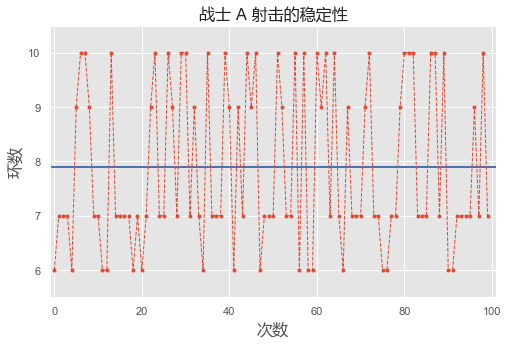

In [169]:
stabilityOfShooting('A', pmf_A, 100)

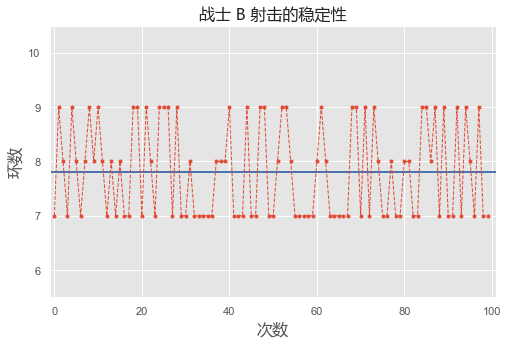

In [170]:
stabilityOfShooting('B', pmf_B, 100)

下面，我们考察如果只射击一次，两名战士谁的胜面大一些

In [171]:
# 试验次数
trails = 10000

results_A = X.rvs(size=trails)
results_B = Y.rvs(size=trails)

for i in range(10):
    print('第 {:2d} 次比拼，战士 A 为 {:2d} 环，战士 B 为 {:2d} 环.'.format(i+1, results_A[i], results_B[i]))
    
wins = Counter(['A 胜' if a > b else 'B 胜' if b > a else '平局' for a,b in zip(results_A, results_B)])

print()
print('比拼 {} 次，其中 A 胜 {:2d} 局，B 胜 {:2d} 局，平手 {:2d} 局.'.format(trails, wins['A 胜'], wins['B 胜'], wins['平局']))

第  1 次比拼，战士 A 为  7 环，战士 B 为  7 环.
第  2 次比拼，战士 A 为  7 环，战士 B 为  8 环.
第  3 次比拼，战士 A 为  7 环，战士 B 为  7 环.
第  4 次比拼，战士 A 为  6 环，战士 B 为  7 环.
第  5 次比拼，战士 A 为 10 环，战士 B 为  9 环.
第  6 次比拼，战士 A 为  7 环，战士 B 为  8 环.
第  7 次比拼，战士 A 为  6 环，战士 B 为  7 环.
第  8 次比拼，战士 A 为  7 环，战士 B 为  9 环.
第  9 次比拼，战士 A 为 10 环，战士 B 为  7 环.
第 10 次比拼，战士 A 为  7 环，战士 B 为  7 环.

比拼 10000 次，其中 A 胜 3636 局，B 胜 4086 局，平手 2278 局.


这里，我们发现，虽然 A 战士平均看来更好，但是 B 战士的发挥更稳定，胜的可能性反而更大. 当然，这里方差的波动有两种情形，可能朝好的方向波动，也可能朝坏的方向波动。因此也不一定方差越大越不好。例如在股票投资中，期望表示预期收益，方差表示风险。这里风险是个中性词，实际收益好于预期也是风险，当然，这种风险是我们想要的。